# Optimización de Hiperparámetros con Optuna

Este cuaderno utiliza Optuna para optimizar modelos de clasificación: XGBoost, LightGBM y una red neuronal básica con sklearn, usando el dataset de churn en telecomunicaciones.

In [7]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Dataset de churn en telecomunicaciones (puedes reemplazar la ruta si tienes el archivo local)
url = 'C:/MLOPS/clase_mlops/Proyecto_1/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
# Eliminar columnas no necesarias
df.drop(['customerID'], axis=1, inplace=True)

# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Variables
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Optimización de XGBoost con Optuna

In [9]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
study_xgb.best_params

[I 2025-03-27 20:35:55,149] A new study created in memory with name: no-name-3feda961-9391-4905-a212-0397bf532c1a
[I 2025-03-27 20:35:55,564] Trial 0 finished with value: 0.545818544719962 and parameters: {'n_estimators': 139, 'max_depth': 8, 'learning_rate': 0.274239065382675, 'subsample': 0.5357812125620195, 'colsample_bytree': 0.7801977180965379}. Best is trial 0 with value: 0.545818544719962.
[I 2025-03-27 20:35:55,999] Trial 1 finished with value: 0.5050247751191808 and parameters: {'n_estimators': 145, 'max_depth': 8, 'learning_rate': 0.01904893435283717, 'subsample': 0.7057476483264455, 'colsample_bytree': 0.7313921612768721}. Best is trial 0 with value: 0.545818544719962.
[I 2025-03-27 20:35:56,512] Trial 2 finished with value: 0.5384557602487439 and parameters: {'n_estimators': 352, 'max_depth': 5, 'learning_rate': 0.17064835355108468, 'subsample': 0.9195571197313899, 'colsample_bytree': 0.6533029427000696}. Best is trial 0 with value: 0.545818544719962.
[I 2025-03-27 20:35:56

{'n_estimators': 387,
 'max_depth': 4,
 'learning_rate': 0.06376878832452434,
 'subsample': 0.5888324651752601,
 'colsample_bytree': 0.8681712410264677}

## Optimización de LightGBM con Optuna

In [10]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = lgb.LGBMClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)
study_lgb.best_params

[I 2025-03-27 20:37:31,101] A new study created in memory with name: no-name-2eb57de3-e536-4de0-86f7-a8c29a7ba6f7


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:31,483] Trial 0 finished with value: 0.5351117227762083 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.15813638579378647, 'subsample': 0.5131543748256535, 'colsample_bytree': 0.5818270676850935}. Best is trial 0 with value: 0.5351117227762083.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:31,703] Trial 1 finished with value: 0.5351157468886903 and parameters: {'n_estimators': 141, 'max_depth': 6, 'learning_rate': 0.2692887292748843, 'subsample': 0.6937798015701921, 'colsample_bytree': 0.9104274291539446}. Best is trial 1 with value: 0.5351157468886903.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:32,281] Trial 2 finished with value: 0.5257476130306128 and parameters: {'n_estimators': 352, 'max_depth': 10, 'learning_rate': 0.24925858405428533, 'subsample': 0.9948497098037361, 'colsample_bytree': 0.5593031648474809}. Best is trial 1 with value: 0.5351157468886903.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:32,735] Trial 3 finished with value: 0.5404637923772578 and parameters: {'n_estimators': 377, 'max_depth': 6, 'learning_rate': 0.08053029656860894, 'subsample': 0.5078046169646744, 'colsample_bytree': 0.6656501548412139}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:32,917] Trial 4 finished with value: 0.5297757496250869 and parameters: {'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.022075507595292282, 'subsample': 0.7493594737926542, 'colsample_bytree': 0.9066752067792858}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:33,362] Trial 5 finished with value: 0.5291064055822488 and parameters: {'n_estimators': 307, 'max_depth': 9, 'learning_rate': 0.2717615635919329, 'subsample': 0.5256380600626698, 'colsample_bytree': 0.6973543172501755}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds

[I 2025-03-27 20:37:33,624] Trial 6 finished with value: 0.5311117549691082 and parameters: {'n_estimators': 351, 'max_depth': 3, 'learning_rate': 0.014812867613514465, 'subsample': 0.7642921338397528, 'colsample_bytree': 0.8635872512048962}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:33,930] Trial 7 finished with value: 0.5364490694910571 and parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.08269993775698889, 'subsample': 0.500387692838523, 'colsample_bytree': 0.8635330508853476}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:34,290] Trial 8 finished with value: 0.5384691739570171 and parameters: {'n_estimators': 343, 'max_depth': 5, 'learning_rate': 0.1564127395304017, 'subsample': 0.8613406555670411, 'colsample_bytree': 0.5063003269509565}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:34,641] Trial 9 finished with value: 0.5310983412608349 and parameters: {'n_estimators': 240, 'max_depth': 8, 'learning_rate': 0.15633533733606125, 'subsample': 0.5165625699163573, 'colsample_bytree': 0.8466994686953926}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:35,017] Trial 10 finished with value: 0.5377944644308698 and parameters: {'n_estimators': 389, 'max_depth': 5, 'learning_rate': 0.08683233573949192, 'subsample': 0.6335235366816582, 'colsample_bytree': 0.7077913842162288}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:35,367] Trial 11 finished with value: 0.5311077308566262 and parameters: {'n_estimators': 306, 'max_depth': 5, 'learning_rate': 0.19968788283334388, 'subsample': 0.8934757629926973, 'colsample_bytree': 0.503365769030079}. Best is trial 3 with value: 0.5404637923772578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:35,761] Trial 12 finished with value: 0.5404691578605672 and parameters: {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.09154845393279185, 'subsample': 0.8567740807535431, 'colsample_bytree': 0.623926921886369}. Best is trial 12 with value: 0.5404691578605672.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:36,267] Trial 13 finished with value: 0.533767669207223 and parameters: {'n_estimators': 396, 'max_depth': 6, 'learning_rate': 0.08329147432334251, 'subsample': 0.8545281778395246, 'colsample_bytree': 0.6365120762237262}. Best is trial 12 with value: 0.5404691578605672.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:36,516] Trial 14 finished with value: 0.5424812141015632 and parameters: {'n_estimators': 297, 'max_depth': 4, 'learning_rate': 0.1069495619145161, 'subsample': 0.9503459673061472, 'colsample_bytree': 0.7814825533407308}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:36,800] Trial 15 finished with value: 0.5411385019034052 and parameters: {'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.11449485856782782, 'subsample': 0.9815275370365023, 'colsample_bytree': 0.7789750845086879}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-27 20:37:37,049] Trial 16 finished with value: 0.5284303546852741 and parameters: {'n_estimators': 287, 'max_depth': 4, 'learning_rate': 0.20979324296740143, 'subsample': 0.9920171476653121, 'colsample_bytree': 0.7796174525207006}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:37,284] Trial 17 finished with value: 0.5404691578605672 and parameters: {'n_estimators': 271, 'max_depth': 4, 'learning_rate': 0.12339718894512998, 'subsample': 0.9457022039852803, 'colsample_bytree': 0.9907359850000057}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:37,495] Trial 18 finished with value: 0.5418132114295525 and parameters: {'n_estimators': 210, 'max_depth': 4, 'learning_rate': 0.12780625074015756, 'subsample': 0.9249635509068799, 'colsample_bytree': 0.780544114993656}. Best is trial 14 with value: 0.5424812141015632.
[I 2025-03-27 20:37:37,629] Trial 19 finished with value: 0.5291144538072128 and parameters: {'n_estimators': 104, 'max_depth': 3, 'learning_rate': 0.046172176274842255, 'subsample': 0.9148031841310396, 'colsample_bytree': 0.7727561031233273}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:37,962] Trial 20 finished with value: 0.5391264456624092 and parameters: {'n_estimators': 208, 'max_depth': 7, 'learning_rate': 0.187800520070271, 'subsample': 0.7881797706280708, 'colsample_bytree': 0.7109176964261447}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:38,201] Trial 21 finished with value: 0.5324383707173382 and parameters: {'n_estimators': 267, 'max_depth': 4, 'learning_rate': 0.1187070579977973, 'subsample': 0.959660742277864, 'colsample_bytree': 0.8054247080660674}. Best is trial 14 with value: 0.5424812141015632.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:38,423] Trial 22 finished with value: 0.5464945956169367 and parameters: {'n_estimators': 203, 'max_depth': 4, 'learning_rate': 0.12444951785709138, 'subsample': 0.9218721350090983, 'colsample_bytree': 0.7514204005624884}. Best is trial 22 with value: 0.5464945956169367.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:38,570] Trial 23 finished with value: 0.547165281030602 and parameters: {'n_estimators': 183, 'max_depth': 3, 'learning_rate': 0.13197003048718275, 'subsample': 0.921902147869898, 'colsample_bytree': 0.818639530343094}. Best is trial 23 with value: 0.547165281030602.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:38,735] Trial 24 finished with value: 0.5377958058016971 and parameters: {'n_estimators': 174, 'max_depth': 3, 'learning_rate': 0.046660733473057076, 'subsample': 0.8115545810285038, 'colsample_bytree': 0.731935199462377}. Best is trial 23 with value: 0.547165281030602.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:38,902] Trial 25 finished with value: 0.5398065206718657 and parameters: {'n_estimators': 173, 'max_depth': 3, 'learning_rate': 0.1821168564744215, 'subsample': 0.8781510190327727, 'colsample_bytree': 0.8267326856483789}. Best is trial 23 with value: 0.547165281030602.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:39,134] Trial 26 finished with value: 0.5357824081898737 and parameters: {'n_estimators': 227, 'max_depth': 4, 'learning_rate': 0.2313437897322534, 'subsample': 0.941590710511448, 'colsample_bytree': 0.9148579601233273}. Best is trial 23 with value: 0.547165281030602.
[I 2025-03-27 20:37:39,327] Trial 27 finished with value: 0.5391425421123371 and parameters: {'n_estimators': 129, 'max_depth': 5, 'learning_rate': 0.13760496133284097, 'subsample': 0.8263894232435738, 'colsample_bytree': 0.7530615971368777}. Best is trial 23 with value: 0.547165281030602.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:39,624] Trial 28 finished with value: 0.5404691578605672 and parameters: {'n_estimators': 175, 'max_depth': 7, 'learning_rate': 0.055218136324631524, 'subsample': 0.9085028440437907, 'colsample_bytree': 0.8207281834726081}. Best is trial 23 with value: 0.547165281030602.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.2

[I 2025-03-27 20:37:39,803] Trial 29 finished with value: 0.5431532408860559 and parameters: {'n_estimators': 262, 'max_depth': 3, 'learning_rate': 0.16995414076625065, 'subsample': 0.7195091209156046, 'colsample_bytree': 0.9690571304713511}. Best is trial 23 with value: 0.547165281030602.


{'n_estimators': 183,
 'max_depth': 3,
 'learning_rate': 0.13197003048718275,
 'subsample': 0.921902147869898,
 'colsample_bytree': 0.818639530343094}

## Optimización de Red Neuronal (MLPClassifier) con Optuna

In [12]:
def objective_nn(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(64,), (128,), (64,32)])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.1)

    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                                       alpha=alpha,
                                                       learning_rate_init=learning_rate_init,
                                                       max_iter=500, random_state=42))
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

study_nn = optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn, n_trials=30)
study_nn.best_params

[I 2025-03-27 20:39:24,464] A new study created in memory with name: no-name-81901b9d-621b-4a1a-87b1-3ea81755fc57
[I 2025-03-27 20:39:25,897] Trial 0 finished with value: 0.5330768632311477 and parameters: {'hidden_layer_sizes': (128,), 'alpha': 0.006056784729840543, 'learning_rate_init': 0.0860898023390253}. Best is trial 0 with value: 0.5330768632311477.
[I 2025-03-27 20:39:27,231] Trial 1 finished with value: 0.521051473764128 and parameters: {'hidden_layer_sizes': (64,), 'alpha': 3.456479445181461e-05, 'learning_rate_init': 0.05510994647792398}. Best is trial 0 with value: 0.5330768632311477.
[I 2025-03-27 20:39:28,364] Trial 2 finished with value: 0.4796634768868393 and parameters: {'hidden_layer_sizes': (64, 32), 'alpha': 0.004797227315480168, 'learning_rate_init': 0.06747387952099511}. Best is trial 0 with value: 0.5330768632311477.
[I 2025-03-27 20:39:30,916] Trial 3 finished with value: 0.5378065367683157 and parameters: {'hidden_layer_sizes': (128,), 'alpha': 7.57868632287708

{'hidden_layer_sizes': (128,),
 'alpha': 0.0005274796088435374,
 'learning_rate_init': 0.09326415537352498}

## Visualización de Importancia de Hiperparámetros

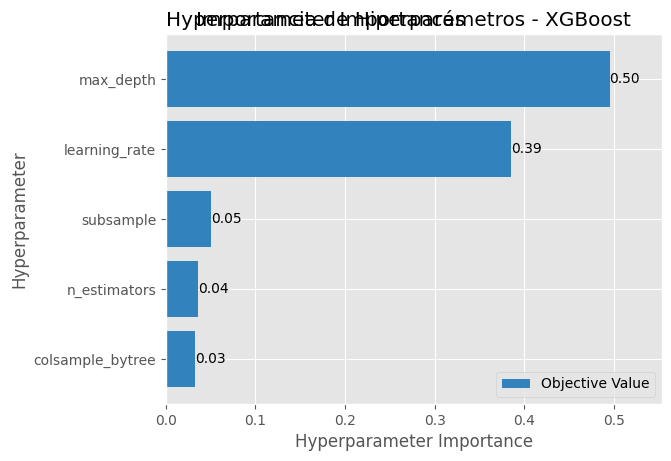

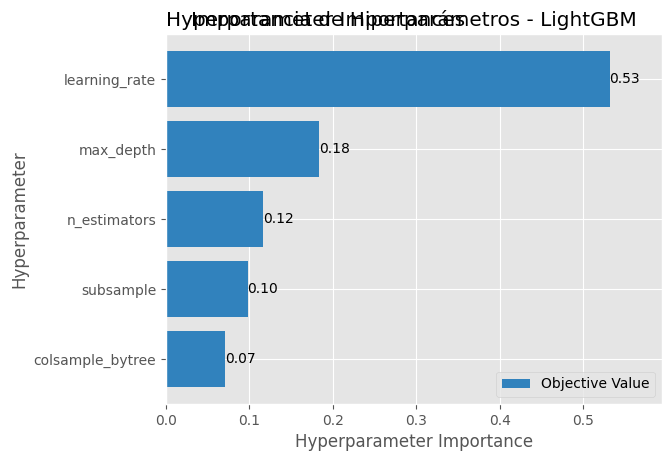

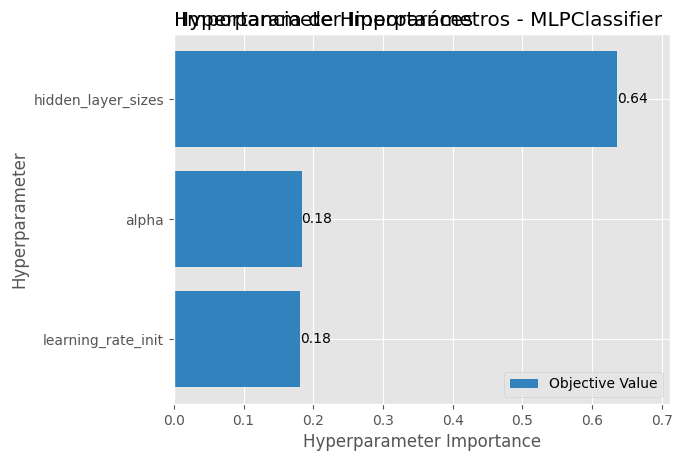

In [17]:
import optuna.visualization.matplotlib as vis
import matplotlib.pyplot as plt

# Visualización para XGBoost
ax_xgb = vis.plot_param_importances(study_xgb)
ax_xgb.set_title("")
ax_xgb.set_title("Importancia de Hiperparámetros - XGBoost")
plt.show()

# Visualización para LightGBM
ax_lgb = vis.plot_param_importances(study_lgb)
ax_lgb.set_title("")
ax_lgb.set_title("Importancia de Hiperparámetros - LightGBM")
plt.show()

# Visualización para Red Neuronal
ax_nn = vis.plot_param_importances(study_nn)
ax_nn.set_title("")
ax_nn.set_title("Importancia de Hiperparámetros - MLPClassifier")
plt.show()